### ライブラリのインポート

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### CSVデータを読み込む

In [6]:
# train_tmp.csv、teat_new.csv、condition_new.csvを読み込む
train_tmp = pd.read_csv('train_tmp.csv')
test_new = pd.read_csv('test_new.csv')
condition_new = pd.read_csv('condition_new.csv')

# 既存CSVファイルを再読み込み
sample = pd.read_csv('sample_submit.csv')
stadium = pd.read_csv('stadium.csv')

# 確認
print(train_tmp.shape)
print(test_new.shape)
print(condition_new.shape)
print(sample.shape)
print(stadium.shape)

(1953, 46)
(351, 10)
(2304, 31)
(312, 2)
(59, 3)


In [7]:
# チーム名を確認する
print(train_tmp['home'].value_counts())
print(train_tmp['away'].value_counts())

# 'ザスパ草津'=>'ザスパクサツ群馬'に変更する
train_tmp = train_tmp.replace('ザスパ草津','ザスパクサツ群馬') 

# チーム名を再確認する
print(train_tmp['home'].value_counts())
print(train_tmp['away'].value_counts())


ＦＣ岐阜           55
愛媛ＦＣ           55
横浜ＦＣ           54
ロアッソ熊本         54
ギラヴァンツ北九州      54
アビスパ福岡         54
ファジアーノ岡山       54
東京ヴェルディ        54
水戸ホーリーホック      54
モンテディオ山形       54
松本山雅ＦＣ         54
カターレ富山         54
ジェフユナイテッド千葉    54
栃木ＳＣ           53
京都サンガF.C.      53
コンサドーレ札幌       51
大分トリニータ        50
徳島ヴォルティス       50
湘南ベルマーレ        50
ヴィッセル神戸        47
ジュビロ磐田         47
ヴァンフォーレ甲府      47
ガンバ大阪          46
サンフレッチェ広島      43
浦和レッズ          43
川崎フロンターレ       43
セレッソ大阪         43
柏レイソル          43
ＦＣ東京           43
名古屋グランパス       43
ガイナーレ鳥取        42
ベガルタ仙台         42
鹿島アントラーズ       42
清水エスパルス        42
アルビレックス新潟      42
横浜Ｆ・マリノス       42
大宮アルディージャ      42
サガン鳥栖          42
Ｖ・ファーレン長崎      33
ザスパクサツ群馬       32
ザスパ草津          21
ＦＣ町田ゼルビア       21
カマタマーレ讃岐       11
Name: home, dtype: int64
京都サンガF.C.      55
栃木ＳＣ           55
アビスパ福岡         54
ロアッソ熊本         54
ギラヴァンツ北九州      54
モンテディオ山形       54
松本山雅ＦＣ         54
水戸ホーリーホック      54
カターレ富山         54
ジェフユナイテッド千葉    54
横浜ＦＣ           54
ファジ

In [8]:
# 観客数0のデータをチェックする
print(train_tmp[train_tmp['y'] == 0])

# 観客数が０であるデータを削除する
train_tmp = train_tmp[train_tmp['y'] > 0]

# 観客数0のデータをチェックする
print(train_tmp[train_tmp['y'] == 0])


         id  y  year stage   match   gameday   time   home     away  \
1385  15699  0  2014    Ｊ１  第４節第１日  03/23(日)  15:04  浦和レッズ  清水エスパルス   

          stadium  ... away_07  away_08  away_09   away_10  away_11  \
1385  埼玉スタジアム２００２  ...   六平　光成     竹内　涼    大前　元紀  ノヴァコヴィッチ     長沢　駿   

               address   capa month week match_num  
1385  埼玉県さいたま市緑区中野田500  63700     3    日         4  

[1 rows x 46 columns]
Empty DataFrame
Columns: [id, y, year, stage, match, gameday, time, home, away, stadium, tv, home_score, away_score, weather, temperature, humidity, referee, home_team, home_01, home_02, home_03, home_04, home_05, home_06, home_07, home_08, home_09, home_10, home_11, away_team, away_01, away_02, away_03, away_04, away_05, away_06, away_07, away_08, away_09, away_10, away_11, address, capa, month, week, match_num]
Index: []

[0 rows x 46 columns]


### データの可視化

In [12]:
# train_tmpのカラムを確認する
print(train_tmp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1952
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1952 non-null   int64  
 1   y            1952 non-null   int64  
 2   year         1952 non-null   int64  
 3   stage        1952 non-null   object 
 4   match        1952 non-null   object 
 5   gameday      1952 non-null   object 
 6   time         1952 non-null   object 
 7   home         1952 non-null   object 
 8   away         1952 non-null   object 
 9   stadium      1952 non-null   object 
 10  tv           1952 non-null   object 
 11  home_score   1952 non-null   int64  
 12  away_score   1952 non-null   int64  
 13  weather      1952 non-null   object 
 14  temperature  1952 non-null   float64
 15  humidity     1952 non-null   float64
 16  referee      1952 non-null   object 
 17  home_team    1952 non-null   object 
 18  home_01      1952 non-null   object 
 19  home_0

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35251 (\N{CJK UNIFIED IDEOGRAPH-89B3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


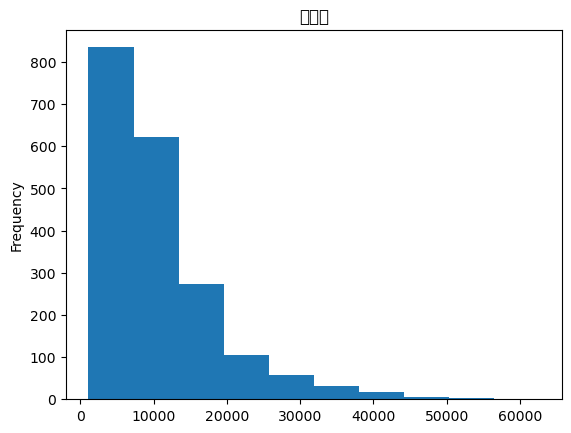

In [9]:
# 観客動員数のヒストグラム作成
y = train_tmp['y']
y.plot.hist(title="観客数")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65322 (\N{FULLWIDTH LATIN CAPITAL LETTER J}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65297 (\N{FULLWIDTH DIGIT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


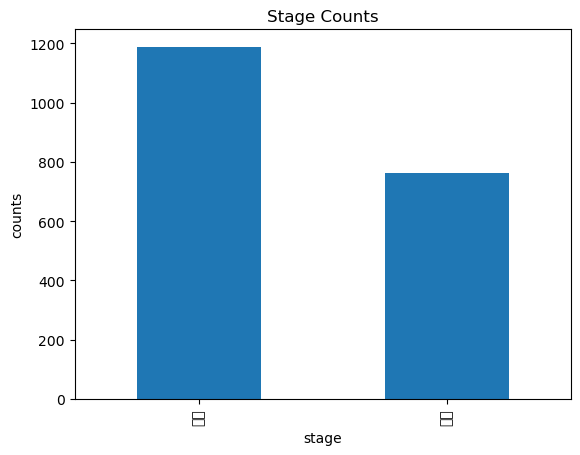

In [11]:
# stageカラムの棒グラフを作成する
stage_counts = train_tmp['stage'].value_counts()

stage_counts.plot.bar(title="Stage Counts")

plt.xlabel("stage")
plt.ylabel("counts")

plt.show()

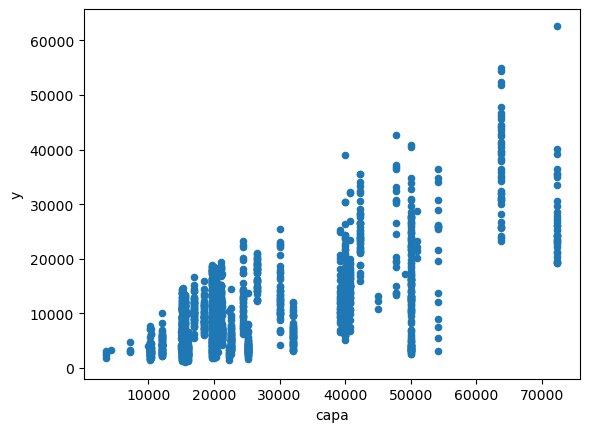

In [13]:
# スタジアムの収容人数と観客動員数の相関図を作成する
train_tmp.plot.scatter(x='capa',y='y')
plt.show()

In [34]:
# train_tmpの相関係数を確認する
print(train_tmp.corr())

                   id         y      year  home_score  away_score  \
id           1.000000 -0.176920  0.942649   -0.025286   -0.008693   
y           -0.176920  1.000000  0.003211    0.056229    0.018226   
year         0.942649  0.003211  1.000000   -0.019708    0.006581   
home_score  -0.025286  0.056229 -0.019708    1.000000   -0.008761   
away_score  -0.008693  0.018226  0.006581   -0.008761    1.000000   
temperature  0.050131 -0.028072 -0.040849    0.016518    0.012447   
humidity    -0.123654 -0.100557 -0.196105    0.060557    0.042446   
capa        -0.111546  0.688290  0.014548    0.046978   -0.007139   
month       -0.097166  0.105861 -0.259396    0.078402    0.007625   
match_num   -0.032474 -0.044138 -0.258279    0.066140   -0.002658   
tv_num      -0.537001  0.142387 -0.496281    0.007989   -0.010855   

             temperature  humidity      capa     month  match_num    tv_num  
id              0.050131 -0.123654 -0.111546 -0.097166  -0.032474 -0.537001  
y              

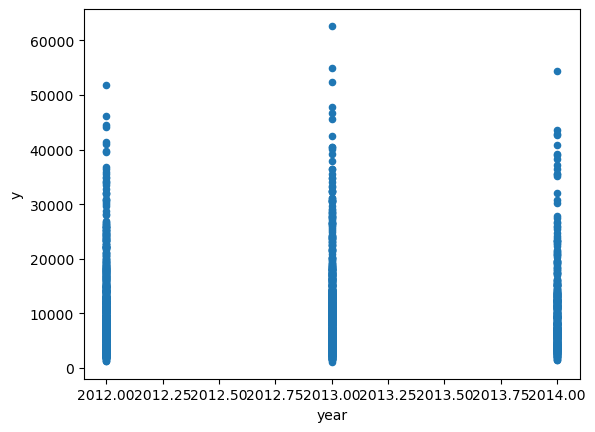

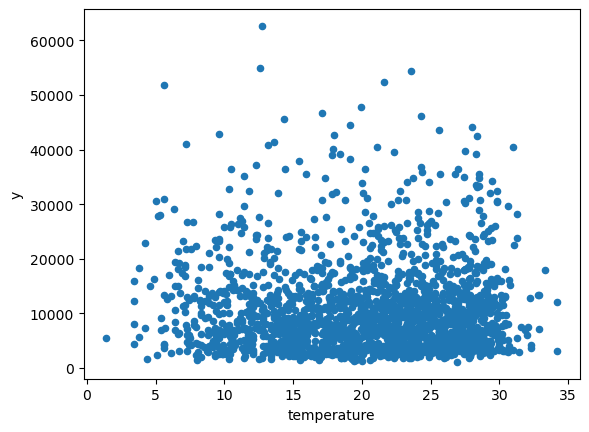

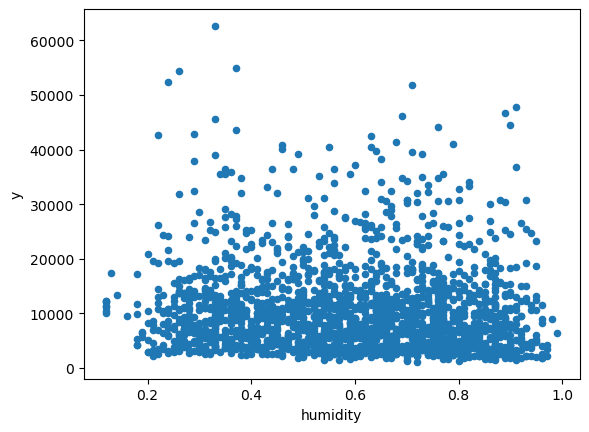

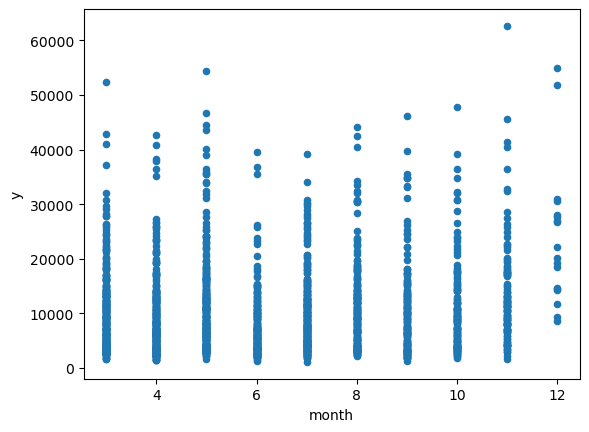

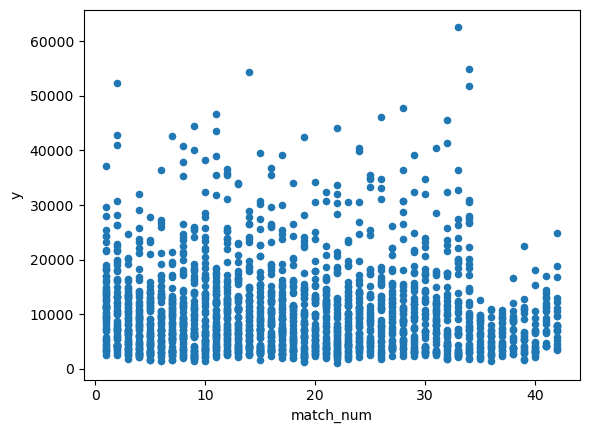

In [19]:
# 各項目と観客動員数の散布図を作成する
# year
train_tmp.plot.scatter(x='year',y='y')
plt.show()
# temperature
train_tmp.plot.scatter(x='temperature',y='y')
plt.show()
# humidity
train_tmp.plot.scatter(x='humidity',y='y')
plt.show()
# month
train_tmp.plot.scatter(x='month',y='y')
plt.show()
# match_num
train_tmp.plot.scatter(x='match_num',y='y')
plt.show()


### 箱ひげ図による相関の確認

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_

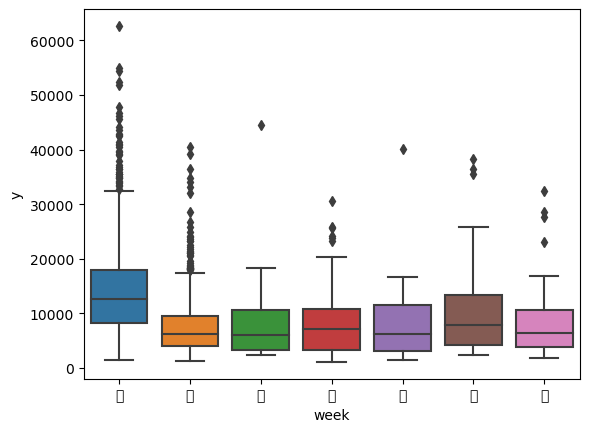

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65322 (\N{FULLWIDTH LATIN CAPITAL LETTER J}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65297 (\N{FULLWIDTH DIGIT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


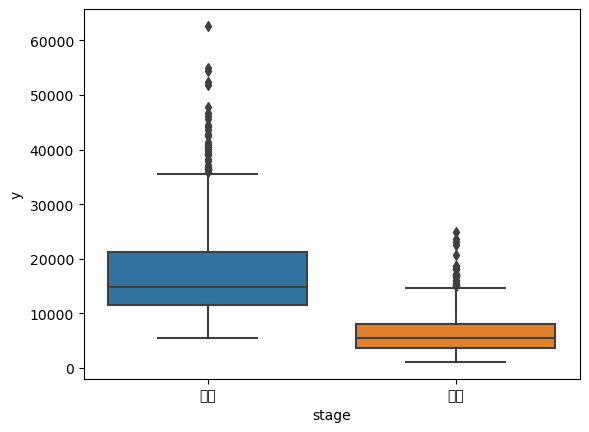

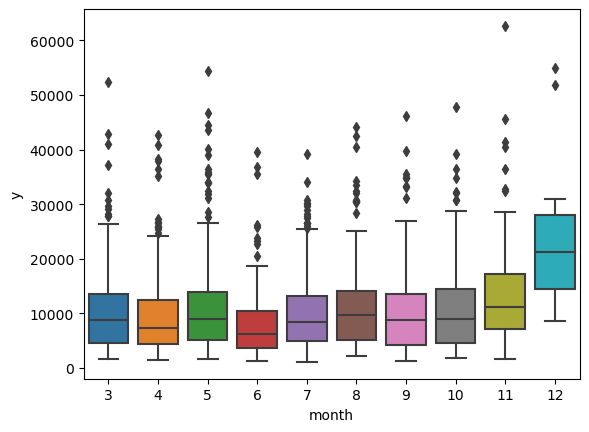

In [22]:
# Seabornをインポートする
import seaborn as sns

# weekとyの相関
sns.boxplot(data=train_tmp,x='week',y='y')
plt.show()

# stageとyの相関
sns.boxplot(data=train_tmp,x='stage',y='y')
plt.show()

# monthとyの相関
sns.boxplot(data=train_tmp,x='month',y='y')
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12505 (\N{KATAKANA LETTER BE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12460 (\N{KATAKANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20185 (\N{CJK UNIFIED IDEOGRAPH-4ED9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anacond

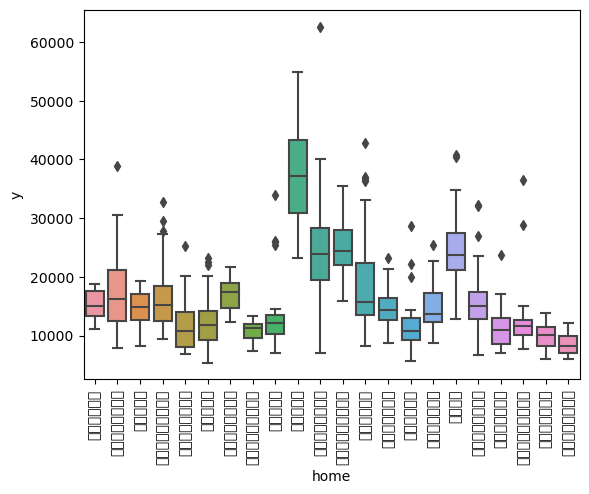

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25144 (\N{CJK UNIFIED IDEOGRAPH-6238}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12507 (\N{KATAKANA LETTER HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

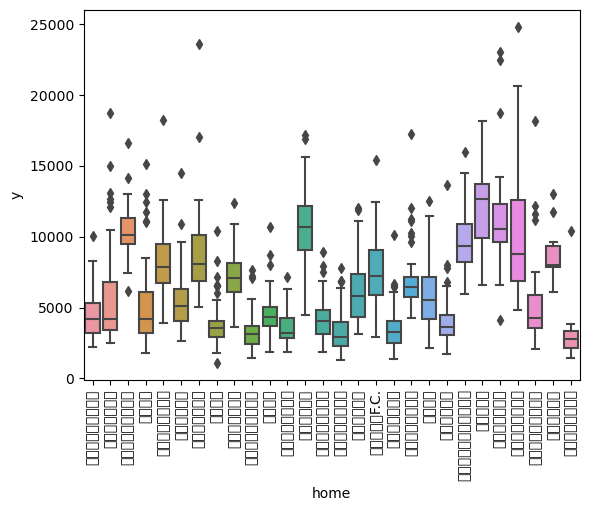

In [28]:
# train_tmpをJ1とJ2のデータに分ける
data_j1 = train_tmp[train_tmp['stage'] == "Ｊ１"]
data_j2 = train_tmp[train_tmp['stage'] == "Ｊ２"]

# J1データのhomeとyの箱ひげ図
sns.boxplot(data=data_j1,x='home',y='y')
plt.xticks(rotation=90)
plt.show()

# J2データのhomeとyの箱ひげ図
sns.boxplot(data=data_j2,x='home',y='y')
plt.xticks(rotation=90)
plt.show()

In [31]:
# train_tmpにtv_numを追加して放送局数を設定する
def get_tvnum(x):
    return len(x.split('／'))

train_tmp['tv_num'] = train_tmp['tv'].apply(get_tvnum)

print(train_tmp['tv_num'].unique())

[4 3 5 2 1]


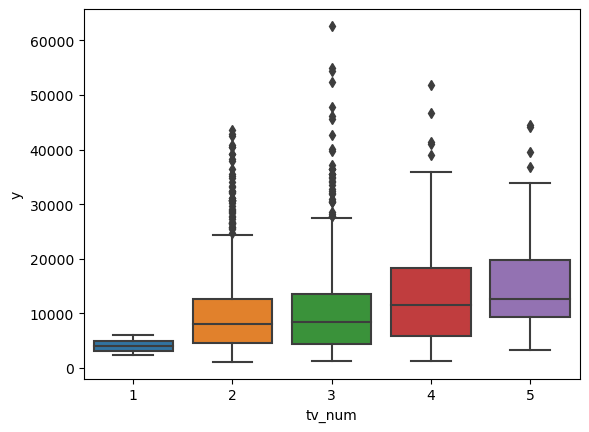

In [33]:
# tv_numとyの相関
sns.boxplot(data=train_tmp,x='tv_num',y='y')
plt.show()

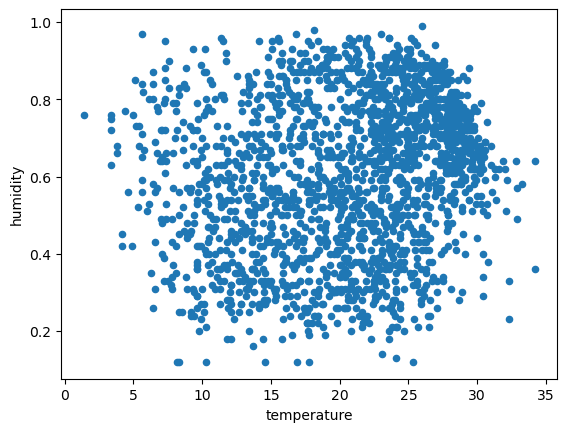

In [35]:
# 気温と湿度の相関
# temperature
train_tmp.plot.scatter(x='temperature',y='humidity')
plt.show()


In [36]:
# 気温＊湿度を算出して項目diに設定する
train_tmp['di'] = train_tmp['temperature'] * train_tmp['humidity']

train_tmp['di'].head(1)

0    2.508
Name: di, dtype: float64

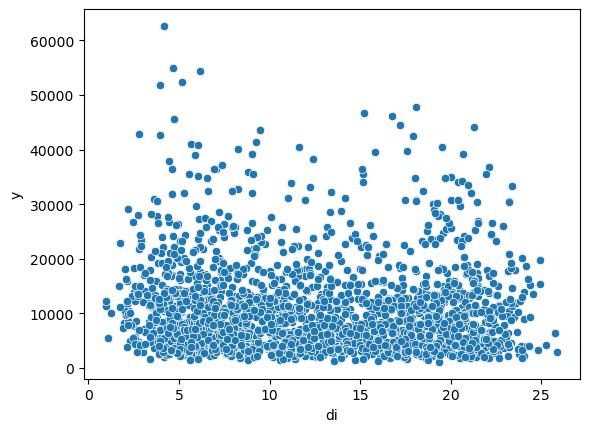

In [38]:
# diとyの散布図
sns.scatterplot(data=train_tmp,x='di',y='y')
plt.show()